In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
import sys,os
import string
import random
path = os.getcwd()

In [14]:
#utility function
def getSubjectNum(fileName) :
    import re
    n = re.findall(r'\d+', fileName)
    return int(n[0])

In [15]:
"""
input_filename -- The name of the input file
rps -- The number of Readings Per Second (that you want to appear in a single image)
figsize -- Figure size (in inches)
activities -- a list of numbers that represents the activities you want to consider
 
1- the function considers all the activities by default
2- it accepts multiple input files

"""
# rps : readingsPerSample
def getXY(input_filenames=["mHealth_subject3.log"],rps=50,activities = range(1,13),column=0):
    counter = 0
    X =  np.array([])
    Y =  np.array([])
    
    for input_filename in input_filenames:
        counter = 0
        df = pd.read_csv(input_filename, header=None, delim_whitespace=True)
        df = df[df[23]!=0] #drop 0 labeled features

        readings_df = pd.DataFrame(df[column].copy())
        targets_df = pd.DataFrame(df[23].copy())
        reading_np = readings_df.values
        # #         segmentation
        for i in range(int(readings_df.shape[0]/rps)):
            if  float(targets_df[i*rps:i*rps+rps].mean()) in activities:
                Y=np.append(Y,targets_df[i*rps:i*rps+rps].mean()) #new
                X=np.append(X,readings_df[i*rps:i*rps+rps].values)
        
    X=X.reshape(-1,rps)
    return X,Y


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  


In [17]:
X,y = getXY(column=9,rps=50,activities=range(1,13),input_filenames=["mHealth_subject1.log","mHealth_subject3.log","mHealth_subject2.log","mHealth_subject4.log","mHealth_subject5.log","mHealth_subject6.log","mHealth_subject7.log","mHealth_subject8.log","mHealth_subject9.log","mHealth_subject10.log"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=7)

In [18]:
knn = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
scores.mean()

0.7835506991484836

In [19]:
scores=[]
for c in range(24):
    X,y = getXY(column=c,rps=50,activities=range(1,12),input_filenames=["mHealth_subject3.log"])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=7)
    knn = KNeighborsClassifier(n_neighbors=1)
    score = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    scores+=[score.mean()]

<BarContainer object of 24 artists>

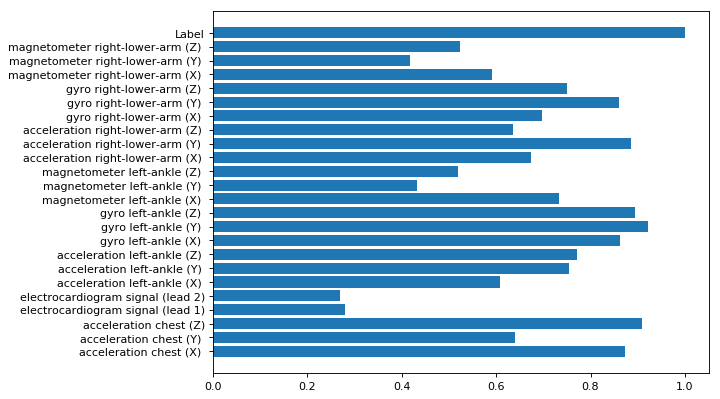

In [20]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
labels = ["acceleration chest (X) ","acceleration chest (Y) ","acceleration chest (Z)","electrocardiogram signal (lead 1)","electrocardiogram signal (lead 2)","acceleration left-ankle (X) ","acceleration left-ankle (Y) ","acceleration left-ankle (Z) ","gyro left-ankle (X) ","gyro left-ankle (Y) ","gyro left-ankle (Z) ","magnetometer left-ankle (X) ","magnetometer left-ankle (Y) ","magnetometer left-ankle (Z) ","acceleration right-lower-arm (X) ","acceleration right-lower-arm (Y) ","acceleration right-lower-arm (Z) ","gyro right-lower-arm (X) ","gyro right-lower-arm (Y) ","gyro right-lower-arm (Z) ","magnetometer right-lower-arm (X) ","magnetometer right-lower-arm (Y) ","magnetometer right-lower-arm (Z) ","Label"]
plt.yticks(np.arange(24), labels)
plt.barh(range(24),scores)

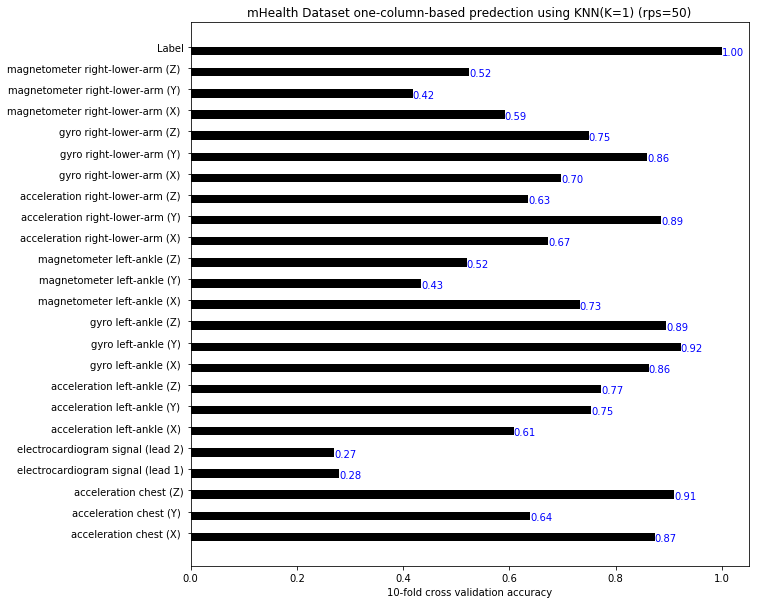

In [21]:
x = labels
y = scores

# fig, ax = plt.subplots()  
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
width = 2 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ind = 5*ind
ax.barh(ind, y, width, color="black")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x)
plt.title('mHealth Dataset one-column-based predection using KNN(K=1) (rps=50)')
plt.xlabel('10-fold cross validation accuracy')
for i, v in enumerate(y):
    ax.text(v, i*5-1, "%.2f"%(v), color='blue', fontsize=10)
#plt.show()

0.6249389261335102


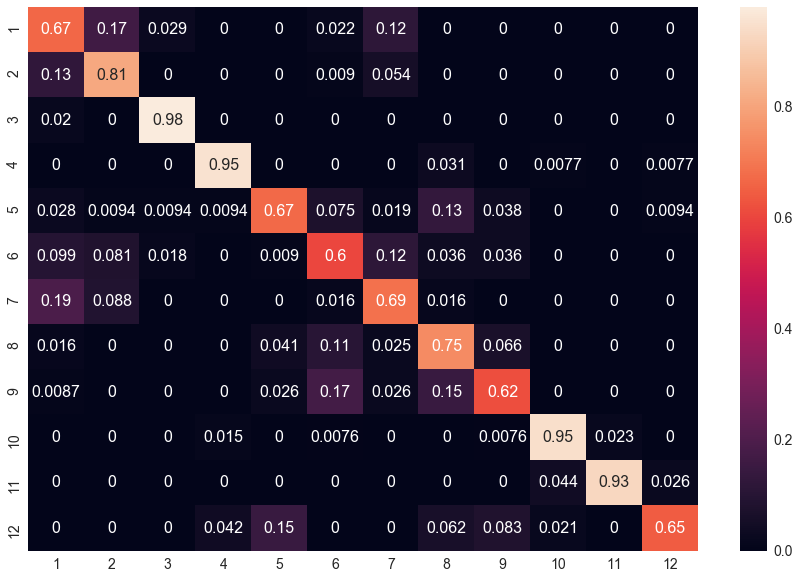

In [22]:
# Example of a confusion matrix in Python
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


X,y = getXY(column=9,rps=50,activities=range(1,13),input_filenames=["mHealth_subject1.log","mHealth_subject3.log","mHealth_subject2.log","mHealth_subject4.log","mHealth_subject5.log","mHealth_subject6.log","mHealth_subject7.log","mHealth_subject8.log","mHealth_subject9.log","mHealth_subject10.log"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=7)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores.mean())
array = confusion_matrix(y_test, y_pred)


# min_max_scaler = preprocessing.MinMaxScaler()
# array_scaled = min_max_scaler.fit_transform(array)
# # df = pandas.DataFrame(array_scaled)
array = array.astype('float') / array.sum(axis=1)[:, np.newaxis]



df_cm = pd.DataFrame(array, range(1,13), range(1,13))
plt.figure(figsize = (15,10))
sn.set(font_scale=1.4)#for label size
svm=sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
figure = svm.get_figure()    
figure.savefig('all_files.png', dpi=400)

In [23]:
scores=[]
files = ["mHealth_subject1.log","mHealth_subject3.log","mHealth_subject2.log","mHealth_subject4.log","mHealth_subject5.log","mHealth_subject6.log","mHealth_subject7.log","mHealth_subject8.log","mHealth_subject9.log","mHealth_subject10.log"]
X,y = getXY(column=9,rps=50,activities=range(1,12),input_filenames=files)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,random_state=7)

In [24]:
scores=[]

for k in [x for x in range(25) if x%2 == 1]:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    scores+=[score.mean()]

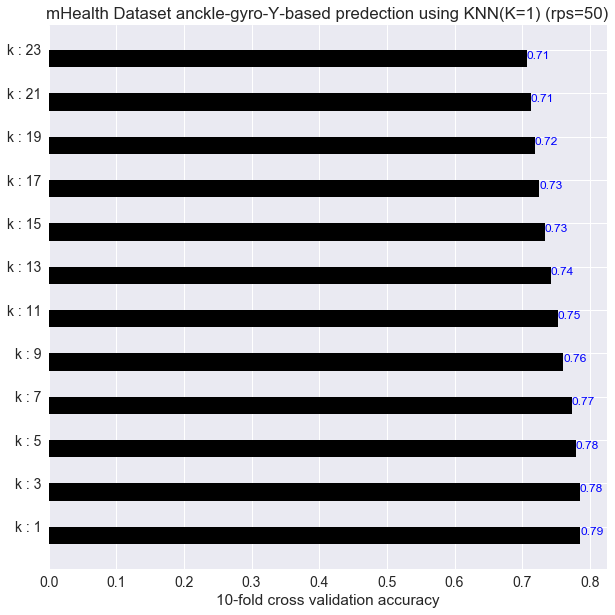

In [25]:
x = ["k : %d"%i for i in [x for x in range(25) if x%2 == 1]]
y = scores

# plt.bar([x for x in range(25) if x%2 == 1],scores)
# fig, ax = plt.subplots()  
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
width = 2 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ind = 5*ind
ax.barh(ind, y, width, color="black")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x)
plt.title('mHealth Dataset anckle-gyro-Y-based predection using KNN(K=1) (rps=50)')
plt.xlabel('10-fold cross validation accuracy')
for i, v in enumerate(y):
    ax.text(v, i*5, "%.2f"%(v), color='blue', fontsize=12)
#plt.show()

In [29]:
scores=[]
from sklearn import model_selection
for file in["mHealth_subject1.log","mHealth_subject2.log","mHealth_subject3.log","mHealth_subject4.log","mHealth_subject5.log","mHealth_subject6.log","mHealth_subject7.log","mHealth_subject8.log","mHealth_subject9.log","mHealth_subject10.log"] :
    print(file)
    X,y = getXY(column=9,rps=50,activities=range(1,12),input_filenames=[file])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=7)
    knn = KNeighborsClassifier(n_neighbors=1)
    kfold = model_selection.KFold(n_splits=10, random_state=4)
    cv_results = model_selection.cross_val_score(knn, X, y, cv=kfold, scoring="accuracy")
    score = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    scores+=[score.mean()]

mHealth_subject1.log
mHealth_subject2.log
mHealth_subject3.log
mHealth_subject4.log
mHealth_subject5.log
mHealth_subject6.log
mHealth_subject7.log
mHealth_subject8.log
mHealth_subject9.log
mHealth_subject10.log


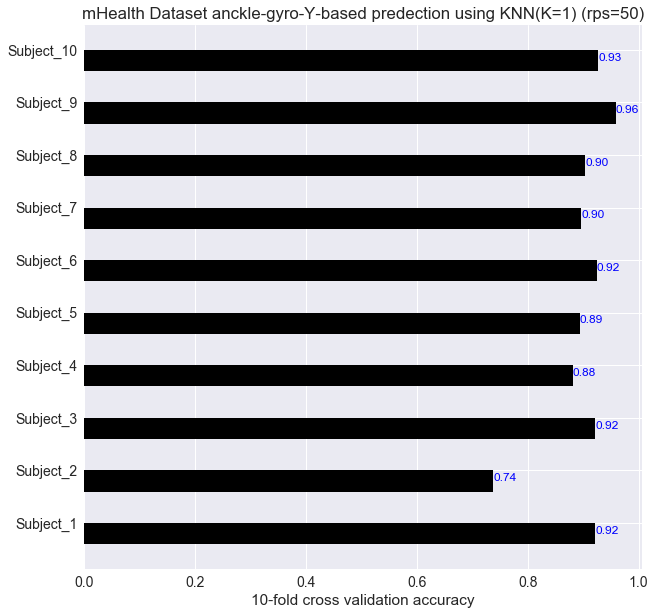

In [30]:
x = ["Subject_%d"%i for i in range(1,11)]
y = scores

# fig, ax = plt.subplots()  
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
width = 2 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ind = 5*ind
ax.barh(ind, y, width, color="black")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x)
plt.title('mHealth Dataset anckle-gyro-Y-based predection using KNN(K=1) (rps=50)')
plt.xlabel('10-fold cross validation accuracy')
for i, v in enumerate(y):
    ax.text(v, i*5, "%.2f"%(v), color='blue', fontsize=12)
#plt.show()

In [31]:
scores=[]
files = ["mHealth_subject1.log"]
X,y = getXY(column=9,rps=50,activities=range(1,12),input_filenames=files)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,random_state=7)